# Are the more firsts being awarded?

## Notes

### Question of interest

Were there more firsts being awarded in 2018 compared to 2014?

### Method

- Data modelled using an approximated normal model
  - Checked with a frequency histogram and normal probability plot
- Calculated mean percentage of first class honours and 95%
  **z**-interval calculated for both the 2014 and 2018 academic years
- Performed a two sample, one-tailed **z**-test of the hypothesis of
  equal means

## Results

### Setup the notebook

In [1]:
# import packages and modules
from scipy import stats
import pandas as pd
import statsmodels.stats.weightstats as sm
import seaborn as sns
import matplotlib.pyplot as plt
import sys

In [2]:
# set seaborn theme
sns.set_theme()

In [3]:
# import custom modules not in root
sys.path[0] = "..\\"  # update path
from src import load, describe, summarise  # noqa: E402

### Import the data

In [4]:
# get data
data: pd.DataFrame = load.Data.get("hesa_grade_inflation")

In [5]:
# preview data
data.head()

,HE provider,f_2014,n_2014,f_2018,n_2018
0,The University of Stirling,265,1230,305,1790
1,University of Hertfordshire,875,4470,1150,4755
2,The University of York,800,3235,1015,3735
3,The University of Liverpool,1085,4805,1765,6635
4,The University of St Andrews,415,1565,515,1765


In [6]:
# check dtypes
data.dtypes

HE provider    object
f_2014         object
n_2014         object
f_2018         object
n_2018         object
dtype: object

In [7]:
# recast columns to int
data[["f_2014", "n_2014", "f_2018", "n_2018"]] = (
    data[["f_2014", "n_2014", "f_2018", "n_2018"]].apply(pd.to_numeric))
data.dtypes

HE provider    object
f_2014          int64
n_2014          int64
f_2018          int64
n_2018          int64
dtype: object

In [8]:
# get both sample percentages
s1 = ((data["f_2014"] / data["n_2014"]) * 100).to_numpy()  # sample 1: AY2014
s2 = ((data["f_2018"] / data["n_2018"]) * 100).to_numpy()  # sample 1: AY2018

### Visualise the data

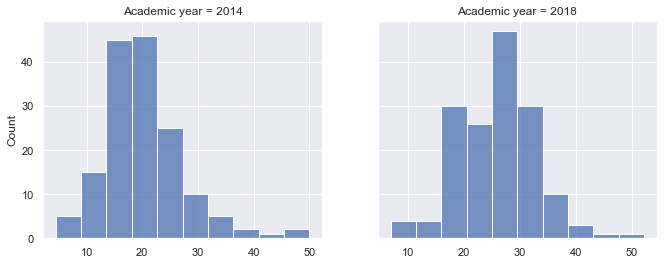

In [24]:
# frequency histograms
f, axs = plt.subplots(ncols=2, sharey=True, figsize=(11, 4))
sns.histplot(x=s1, bins=10, ax=axs[0])
sns.histplot(x=s2, bins=10, ax=axs[1])
axs[0].set(title="Academic year = 2014")
axs[1].set(title="Academic year = 2018")
plt.show()

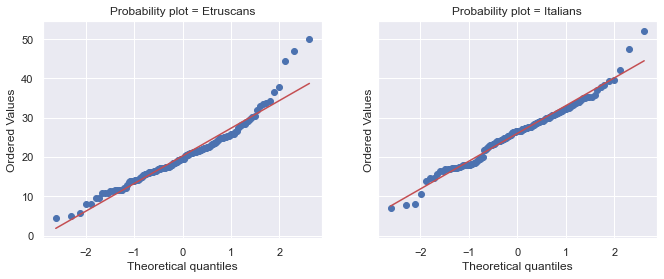

In [10]:
# probability plots
f, axs = plt.subplots(ncols=2, sharey=True, figsize=(11, 4))
stats.probplot(x=s1, plot=axs[0])
stats.probplot(x=s2, plot=axs[1])
axs[0].set(title="Probability plot = Etruscans")
axs[1].set(title="Probability plot = Italians")
plt.show()

### Analyse the data

In [11]:
cm = sm.CompareMeans.from_data(data1=s1, data2=s2)

In [12]:
describe.ZSample(
    "AY2014", cm.d1.nobs, cm.d1.mean, cm.d1.zconfint_mean())

AY2014(size=156, mean=20.288866, zconfint_mean=(19.158782, 21.418950))

In [13]:
describe.ZSample(
    "AY2018", cm.d2.nobs, cm.d2.mean, cm.d2.zconfint_mean())

AY2018(size=156, mean=26.016118, zconfint_mean=(24.905557, 27.126679))

In [14]:
describe.ZDiff(
    cm.d1.mean - cm.d2.mean, cm.zconfint_diff())

Difference(mean_diff=-5.727252, zconfint_diff=(-7.311687, -4.142816))

In [15]:
# run the test
zstat, pval = cm.ztest_ind(alternative="smaller")
summarise.ZTest(zstat, pval)

ResultSummary(zstat=-7.084673, pval=0.000000)